<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_4_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 4.2.3 Exploring t-SNE
The USA Modified National Institute of Standards and Technology (MNIST) data set contains 70,000 images of handwritten digits between 0 and 9. Each grayscale image consists of 28x28 pixels. Each pixel value is a single byte of 0 to 255, representing the grayscale intensity.

The MNIST data set is widely used in machine learning to test and benchmark algorithms. Follow the demonstration to see how to employ t-SNE on a multi-dimensional data set. In this demonstration, you will learn:
- the difference in computing time between PCA and t-SNE
- the difference between PCA and t-SNE plots
- how to evaluate perplexity values
- how to interpret t-SNE plots.

> Some of the code (e.g. importing  the data set, creating visualisations) might take a few minutes to run.

In [ ]:
# Import required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Load the MNIST data set.
mnist = fetch_openml('mnist_784', version=1)

# Specify the variables. We'll only use 10,000 rows.
image_data = mnist['data'][0:10000]
labels = mnist['target'][0:10000]

# View the output.
print("Data shape:", image_data.shape)
print("Data type:", type(image_data))
print("Label shape:", labels.shape)
print("Label type:", type(labels))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data shape: (10000, 784)
Data type: <class 'pandas.core.frame.DataFrame'>

Label shape: (10000,)
Label type: <class 'pandas.core.series.Series'>


In [ ]:
# Normalise the pixel values.
image_data = image_data.astype('float32') / 255

In [ ]:
# Transform the data with PCA.
PCA_model = PCA(n_components=2)
PCA_transformed_data = PCA_model.fit_transform(image_data)

# View the shape and data type.
print("PCA transformed data shape:", PCA_transformed_data.shape)
print("PCA transformed data type:", type(PCA_transformed_data))

PCA transformed data shape: (10000, 2)
PCA transformed data type: <class 'numpy.ndarray'>


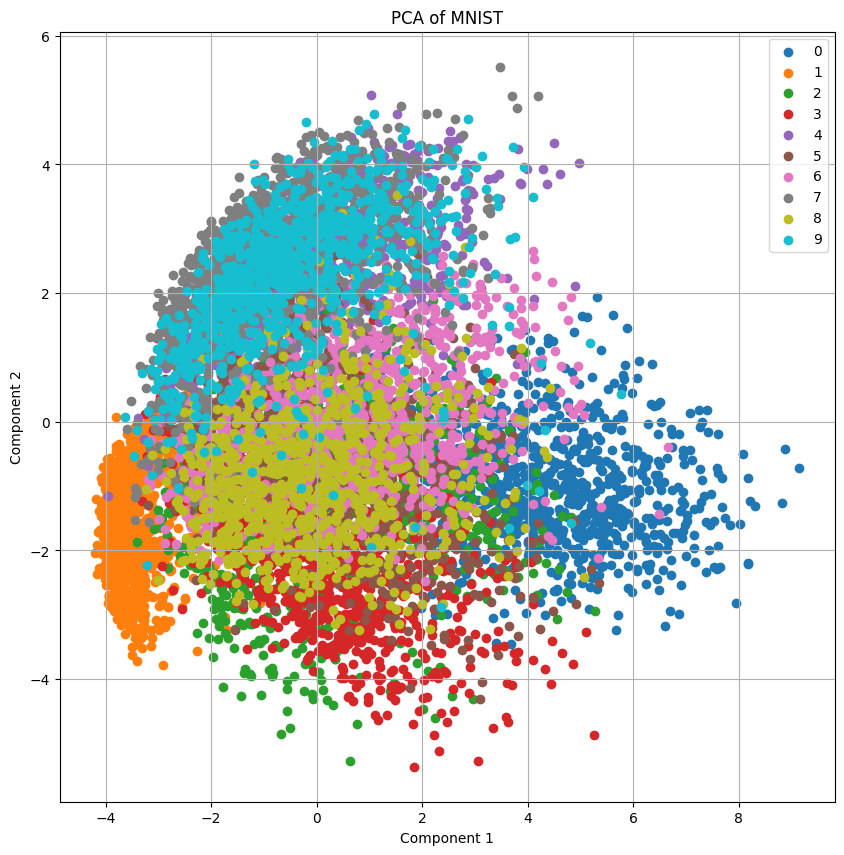

In [ ]:
# Visualise the data with PCA.
# Visualisation
def plot_embedding(X, title, y_subset):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.scatter(X[y_subset == str(i), 0], X[y_subset == str(i), 1], label=str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(PCA_transformed_data, "PCA of MNIST", np.array(labels))

In [ ]:
# Transform the data with t-SNE.
TSNE_model = TSNE(n_components=2, perplexity=30.0)
TSNE_transformed_data = TSNE_model.fit_transform(image_data)

# View the shape and data type.
print("TSNE transformed data shape:", TSNE_transformed_data.shape)
print("TSNE transformed data type:", type(TSNE_transformed_data))

TSNE transformed data shape: (10000, 2)
TSNE transformed data type: <class 'numpy.ndarray'>


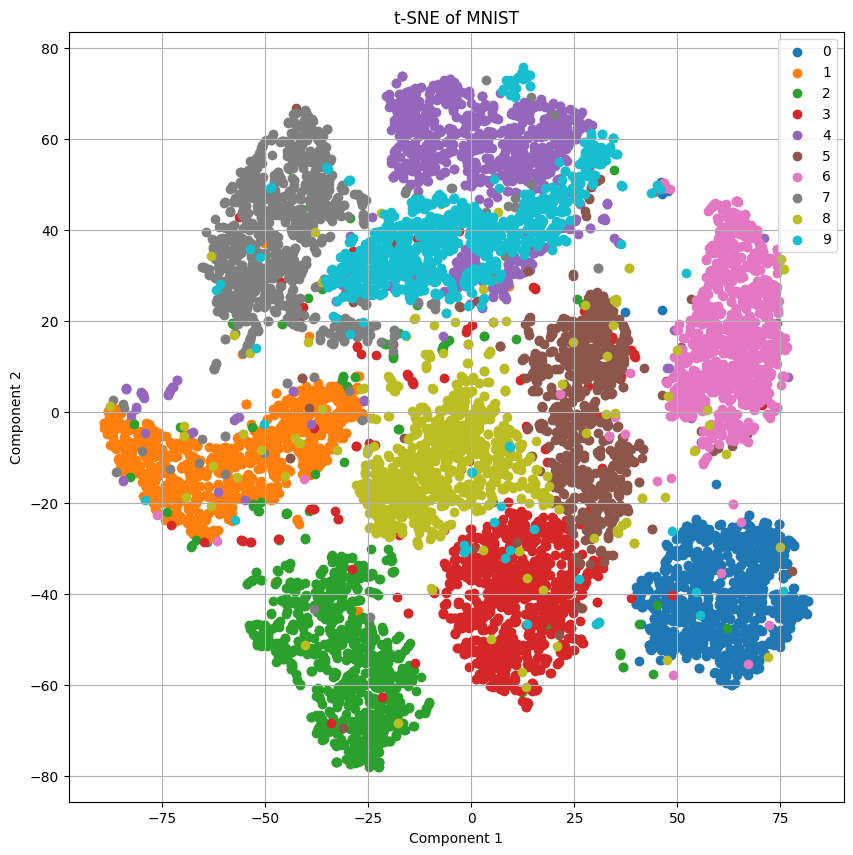

In [ ]:
# Visualise the output.
def plot_embedding(X, title, y_subset):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.scatter(X[y_subset == str(i), 0], X[y_subset == str(i), 1], label=str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(TSNE_transformed_data, "t-SNE of MNIST", np.array(labels))

## Perplexity

Scikit-learn, or sklearn, documentation suggests a perplexity value between 5 and 50. This may depend on your data set. Additionally, selecting different values can produce significantly different results on a case-by-case basis.

* Perplexity = 1: Local variations dominate.
* Perplexity = 75: Global variations dominate.
* Perplexity = 10 or 25: Both in the recommended range and the results seem to be more or less similar.

As you can see, perplexity is an important parameter and should be taken into consideration when working with t-SNE to make sure that visualisations are adjusted correctly.

In [ ]:
# Create a subset of the original data (5,000 values).
n_samples = 5000
np.random.seed(42)

# Choose some random indices.
indices = np.random.choice(len(image_data),
                           n_samples,
                           replace=False)

# Use the indices to get the actual values and store them in a new subset.
X_subset = image_data.iloc[indices].values
y_subset = labels.iloc[indices].values

# View the shape of the subset.
X_subset.shape

(5000, 784)

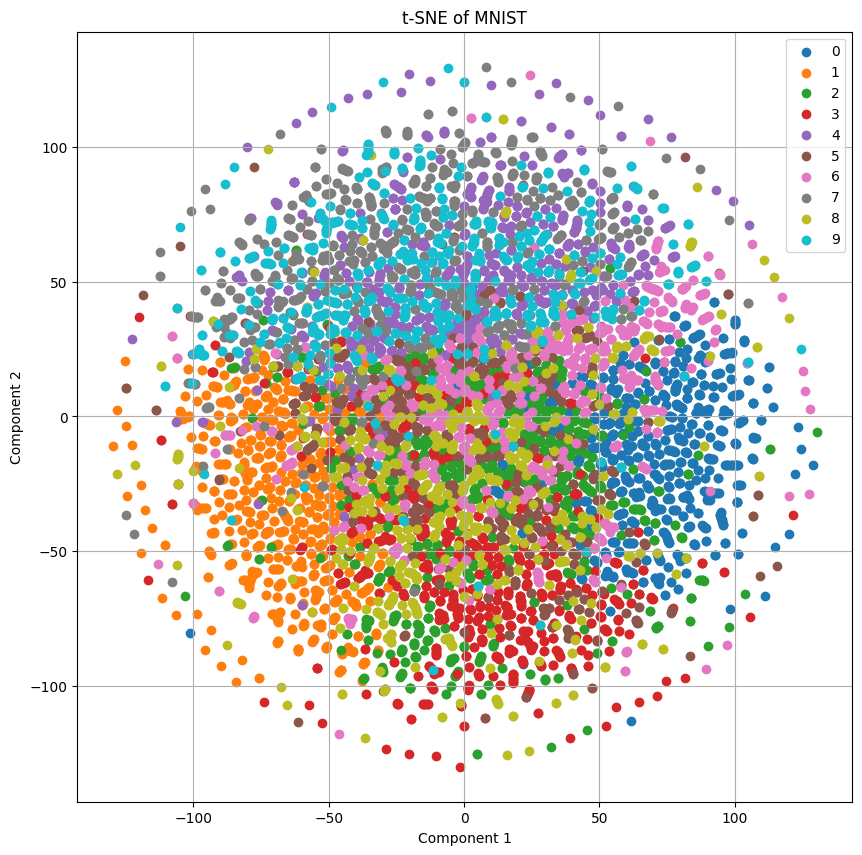

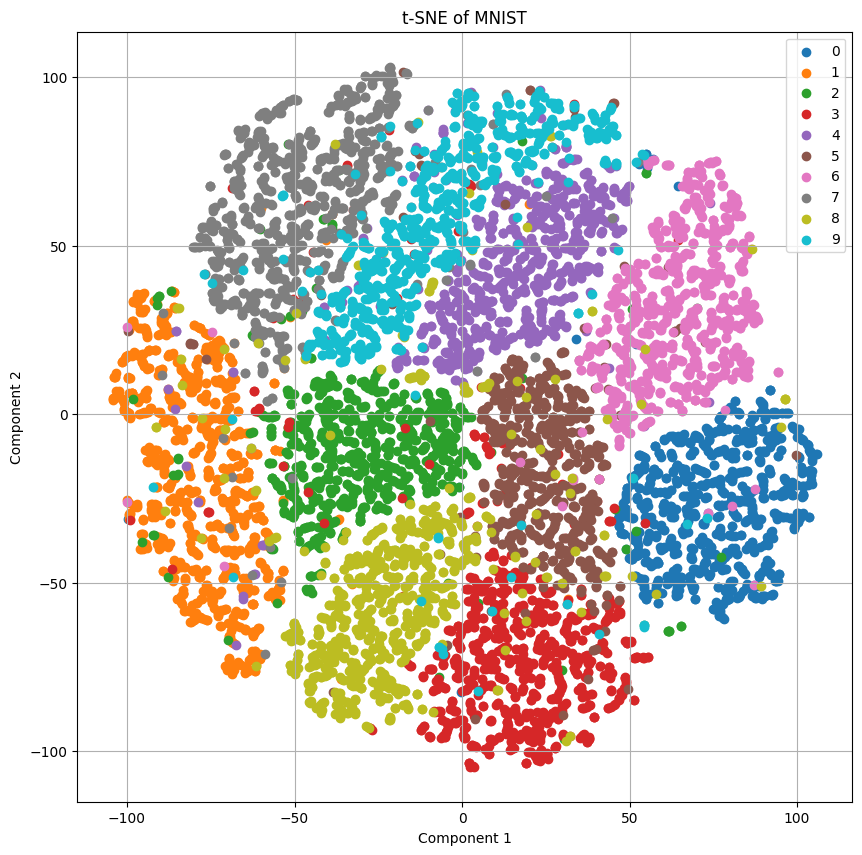

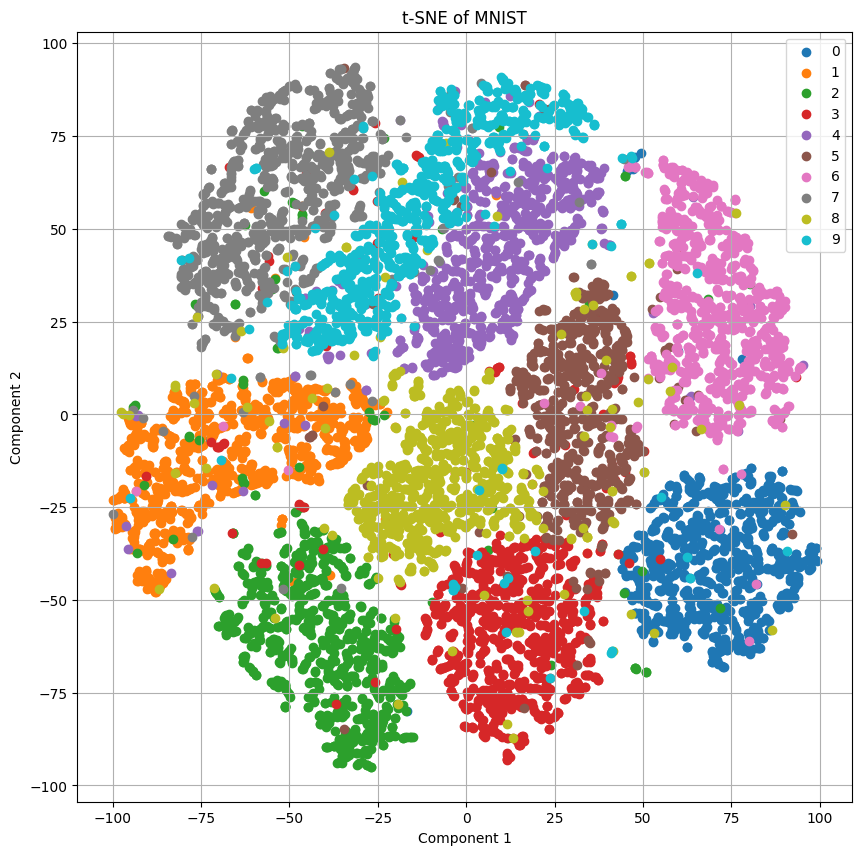

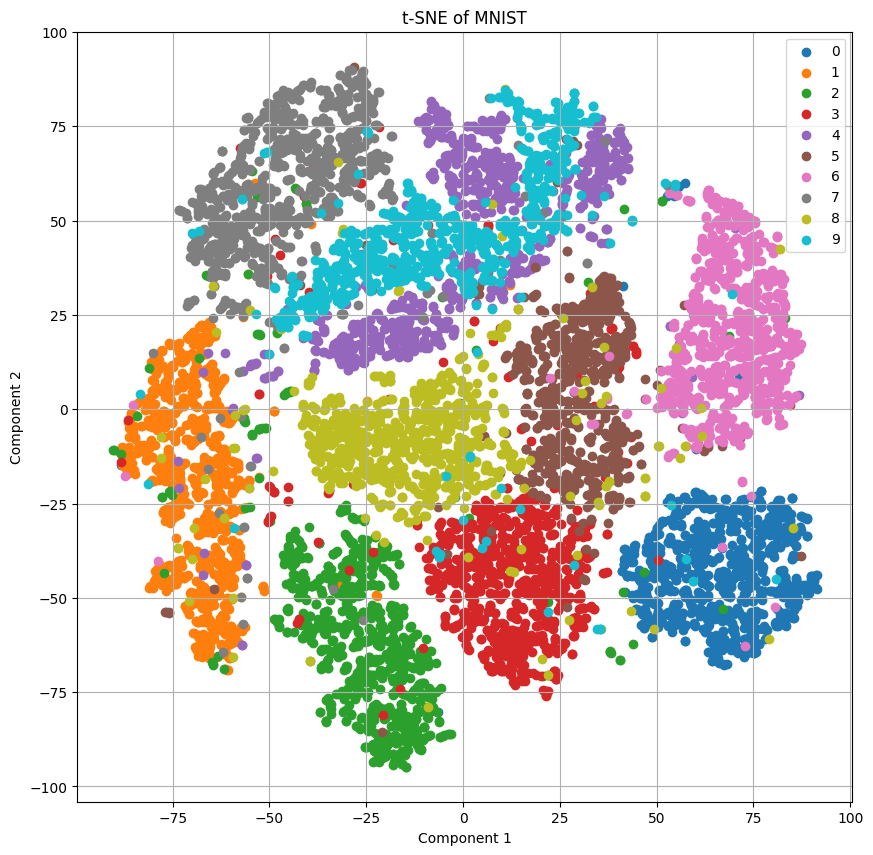

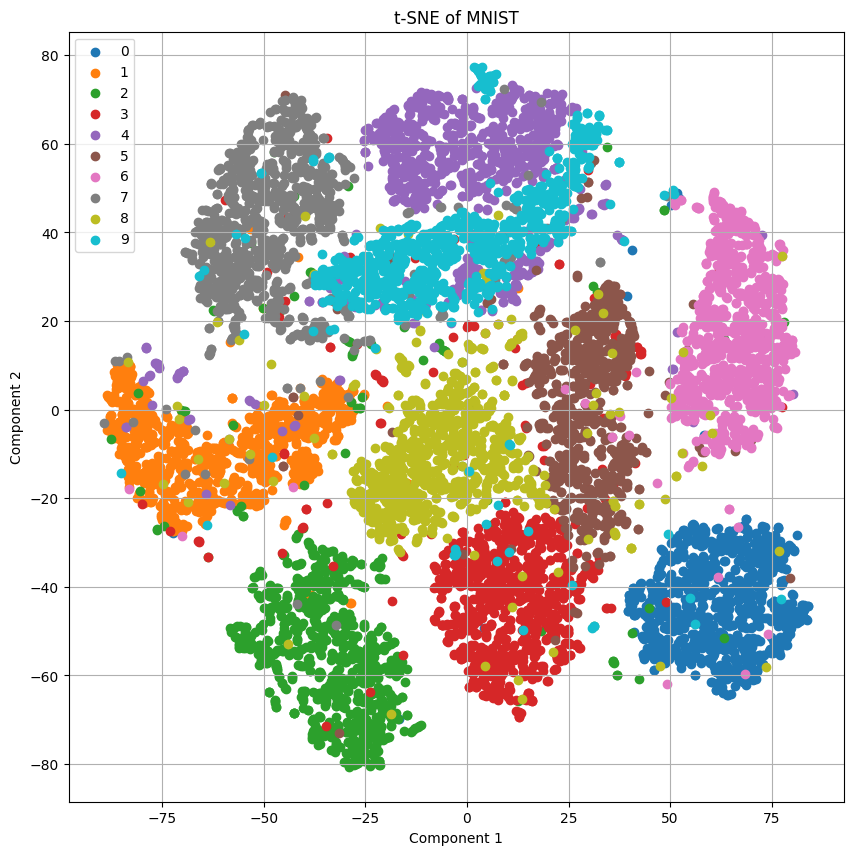

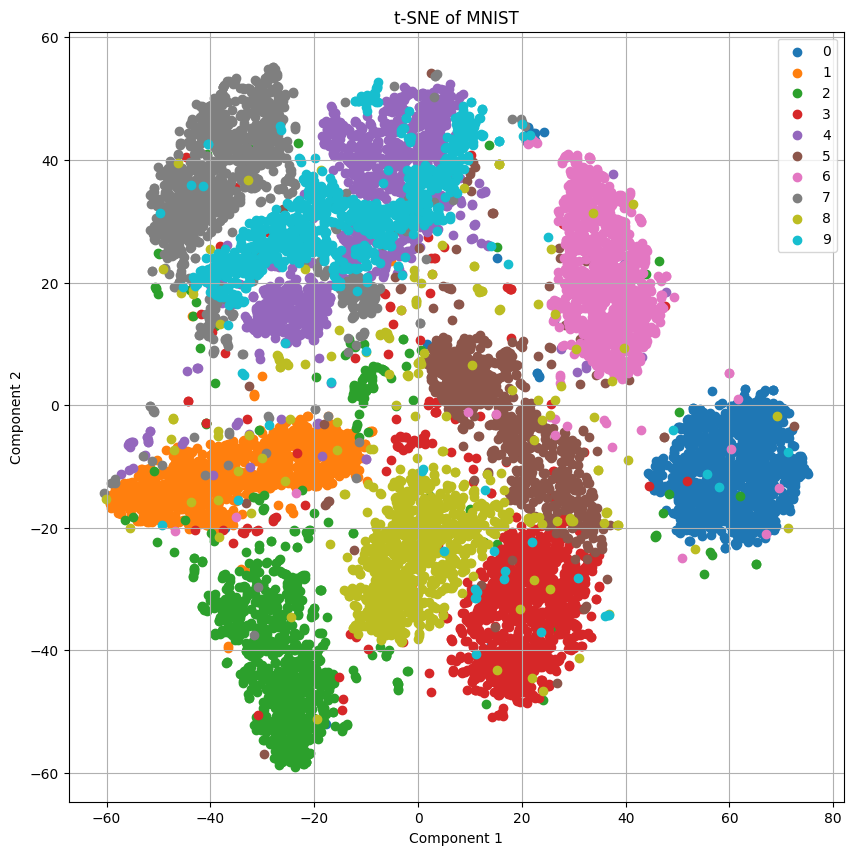

In [ ]:
# Visualise the perplexity data.
def plot_embedding(X, title, y_subset):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.scatter(X[y_subset == str(i), 0], X[y_subset == str(i), 1], label=str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

for index, p in enumerate([1, 5, 10, 15, 25, 75]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(image_data)
    plot_embedding(tsne_results, "t-SNE of MNIST", np.array(labels))

# Using PCA and t-SNE together

We will use PCA to reduce the dimensions from 784 to 100, then feed the output into t-SNE to visualise the clusters in 2D.

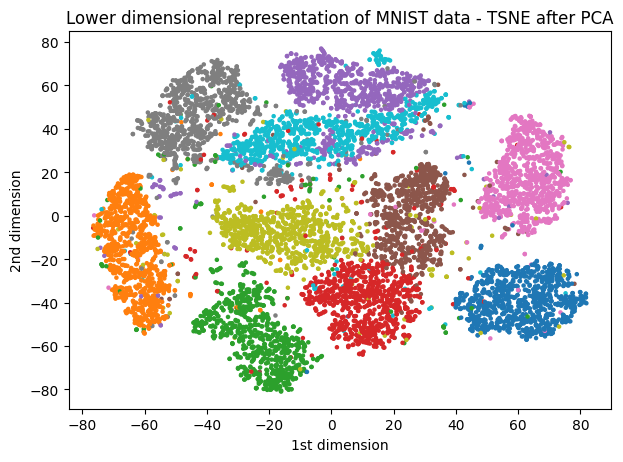

In [ ]:
# Combine PCA and t-SNE.
# Apply PCA.
PCA_model = PCA(n_components=100)
PCA_transformed_data = PCA_model.fit_transform(image_data)

# Apply t-SNE with a perplexity of 30.
TSNE_model = TSNE(n_components=2, perplexity=30.0)
PCA_TSNE_transformed_data = TSNE_model.fit_transform(PCA_transformed_data)

# Create the visualisation.
plt.figure(figsize=[7, 4.9])

plt.scatter(PCA_TSNE_transformed_data[:, 0], PCA_TSNE_transformed_data[:, 1],
            c=np.array(labels).astype('int32'), s=5, cmap='tab10')

plt.title('Lower dimensional representation of MNIST data - TSNE after PCA')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.savefig("PCA_TSNE.png")

## Wine data set
This is a smaller data set. Explore your understanding of t-SNE with this data set.

In [ ]:
# Import the data set and create a DataFrame.
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data,
                       columns=wine.feature_names)

# View the shape.
print(wine.data.shape)
print(df.shape)

(178, 13)
(178, 13)


In [ ]:
# Normalise the data.
df = StandardScaler().fit_transform(df)

df = pd.DataFrame(df, columns=wine.feature_names)

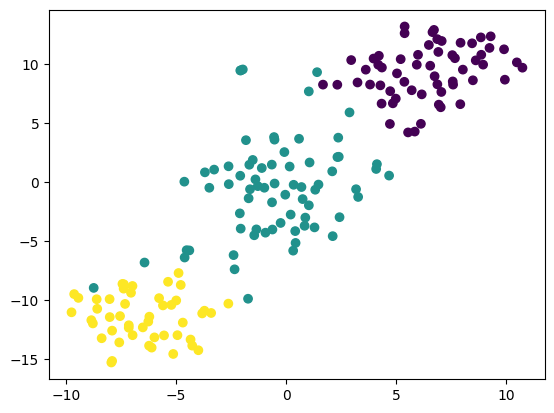

In [ ]:
# 2. Employ t-SNE.
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)

tsne_results=pd.DataFrame(tsne_results,
                          columns=['tsne1', 'tsne2'])

# Create a visualisation.
plt.scatter(tsne_results['tsne1'],
            tsne_results['tsne2'],
            c=wine.target)
plt.show()

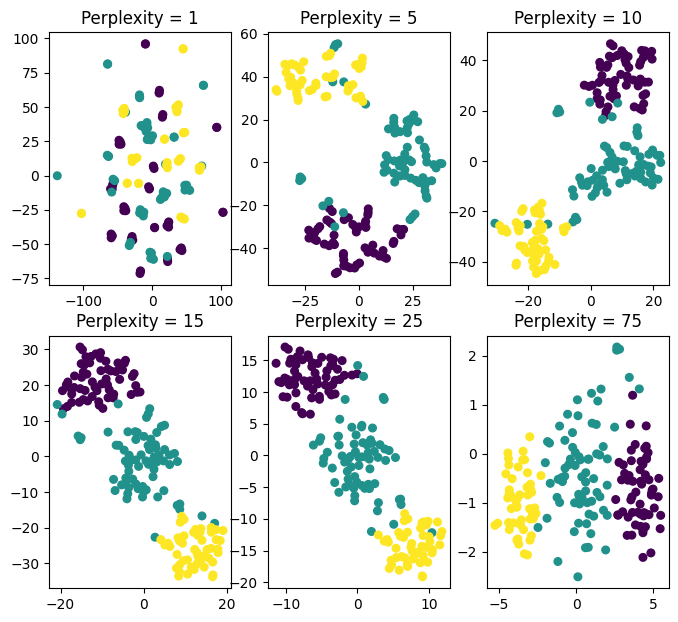

In [ ]:
# Plot perplexity.
plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 5, 10, 15, 25, 75]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(df)

    tsne_results=pd.DataFrame(tsne_results,
                              columns=['tsne1', 'tsne2'])

    plt.subplot(2,3,index+1)
    plt.scatter(tsne_results['tsne1'],
                tsne_results['tsne2'],
                c=wine.target, s=30)
    plt.title('Perplexity = '+ str(p))
plt.show()

# Key information
This demonstration illustrated how PCA and t-SNE can work in symbiosis. PCA can be employed for feature selection, while t-SNE creates a 2D plot.


## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.